# Importing dependencies

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

# this 'device' will be used for training our model
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


# Loading the dataset

In [ ]:
# images are 28x28 pixels
input_size  = 28*56 


#There are 100 possible classes, from 00 to 99
output_size = 100


train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=64, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data',download=True, train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=1000, shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



# Visualizing the dataset

torch.Size([28, 56])
torch.Size([28, 56])
torch.Size([28, 56])
torch.Size([28, 56])
torch.Size([28, 56])
torch.Size([28, 56])
torch.Size([28, 56])
torch.Size([28, 56])
torch.Size([28, 56])


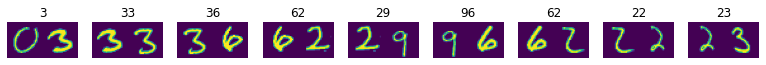

In [ ]:
plt.figure(figsize=(15,7))
import numpy as np
image_batch, label_batch = next(iter(train_loader))
for i in range(10-1):
    image1 = image_batch[i]
    image2=image_batch[i+1]
    label1 = label_batch[i].item()
    label2 = label_batch[i+1].item()
    label=int(str(label1)+str(label2))
    plt.subplot(5, 10, i + 1)
    image=torch.cat((image1[0],image2[0]),axis=1)
    plt.imshow(image)
    print(image.shape)
    plt.axis('off')
    plt.title(label)



<b>To find the number of parameters in the network</b>

In [ ]:
def get_n_params(model):
  np=0
  for p in list(model.parameters()):
    np+=p.nelement()
  return np

<h1>Train the model for one batch of training data</h1>

In [ ]:
def train(epoch,model):
    
  model.train()
  for batch_idx,(data,target) in enumerate(train_loader):
    #Creating an empty tensor to store the concatenated images
    images=torch.tensor([])


    #Creating a tensor for storing the labels of the concatenated images
    labels=torch.tensor([])


    for i in range(len(data)):
      for j in range(len(data)):


        #Concatenating two numbers to form a double digit number
        image=torch.cat((data[i],data[j]),axis=2)
        image=torch.unsqueeze(image,axis=0)


        #Creating the label of the corresponding image
        label=target[i].item() * 10 + target[j].item()


        #Adding the image to the tensor
        images=torch.cat((images,image),axis=0)


        #Adding the label to the tensor
        labels=torch.cat((labels,torch.tensor([label])))

    
    labels = labels.type(torch.LongTensor)
    
    
    #Keeping both the model and the data on the same device
    images,labels=images.to(device),labels.to(device)


    #Initializing zero gradient for our optimizer
    optimizer.zero_grad()
    
    
    #Calculating the output for the training batch
    output=model(images)


    #Specifying the loss function, here using Binary Cross-entropy
    loss=F.nll_loss(output,labels)


    #Initiating backpropagation
    loss.backward()

    optimizer.step()
    
    if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))


<h1>Testing the model on unseen data</h1>

In [ ]:
accuracy_list=[]

def test(model):


    #Evaluating the model
    model.eval()


    #Initializing test loss
    test_loss = 0


    #Initializing the number of labels the model got right
    correct = 0



    for data, target in test_loader:
      images=torch.tensor([])
      labels=torch.tensor([])
      for i in range(len(data)):
        for j in range(len(data)):
          image=torch.cat((data[i],data[j]),axis=2)
          image=torch.unsqueeze(image,axis=0)

          label=target[i].item()*10 + target[j].item() 
          images=torch.cat((images,image),axis=0)
          labels=torch.cat((labels,torch.tensor([label])))
    
      labels = labels.type(torch.LongTensor)
      images, labels = images.to(device), labels.to(device)


      #Calculating the output for the test data    
      output = model(images)


      #Calculating the loss for the testing data and summing up the loss for the entire batch
      test_loss += F.nll_loss(output, labels, reduction='sum').item()


      #Predicting the label
      pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability                                                                 
      correct += pred.eq(labels.data.view_as(pred)).cpu().sum().item()


    #Calculating the net test loss
    test_loss /= len(labels)


    #Calculating model accuracy
    accuracy = 100. * correct / len(labels)
    accuracy_list.append(accuracy)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
          test_loss, correct, len(labels),
          accuracy))

<h1>Creating a class for building the model</h1>

In [ ]:
class FC2Layer(nn.Module):
    def __init__(self, input_size, output_size):
        super(FC2Layer, self).__init__()
        self.input_size = input_size
        self.network = nn.Sequential(
            nn.Linear(input_size, 300), 
            nn.ReLU(), 

            nn.Linear(300,200), 
            nn.ReLU(), 
            nn.Linear(200, output_size), 
            nn.LogSoftmax(dim=1)
        )

    def forward(self, x):
        x = x.view(-1, self.input_size)
        return self.network(x)

<h1>Training the network</h1>

In [ ]:
print("Training on ", device)
model_fnn = FC2Layer(input_size, output_size)
model_fnn.to(device)
optimizer = optim.SGD(model_fnn.parameters(), momentum=0.5,lr=0.01)
print('Number of parameters: {}'.format(get_n_params(model_fnn)))

for epoch in range(0, 4):
    train(epoch, model_fnn)
    test(model_fnn)

Training on  cuda:0
Number of parameters: 641300
Train Epoch: 0 [0/60000 (0%)]	Loss: 4.605742


KeyboardInterrupt: ignored

In [ ]:
torch.save(model_fnn.state_dict(), 'model_aml.h5')

In [ ]:
from collections import deque
a=deque([1,3,4])
a


deque([1, 3, 4])

In [ ]:
def fn(seats):
  vals=[]
  n,l,r=0,0,0
  for i in range(len(seats)):
    r+=1
    if seats[i]==0:
      n+=1
      if i==len(seats)-1:
        vals.append([n,l,r])
        l=r
      else:
        pass
    else:
      vals.append([n,l,r])
      l=r
      n=0 
  vals.sort(reverse=True,key=lambda f:f[0])
  mx=vals[0]
  ans=0
  if mx[1]==0 or mx[2]==len(seats):
    ans=mx[0]
  else:
    ans=mx[0]//2 + 1
  return ans

In [ ]:
fn([1,0,0,0])

3